### Agentic RAG

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [5]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [3]:
urls=[
    "https://langchain-ai.github.io/langgraph/tutorials/introduction/",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraph/how-tos/map-reduce/"
]

docs=[WebBaseLoader(url).load() for url in urls]
docs


[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/how-tos/map-reduce/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')]]

In [6]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstore=FAISS.from_documents(
    documents=doc_splits,
    embedding=OpenAIEmbeddings()
)


retriever=vectorstore.as_retriever()

In [7]:
retriever.invoke("what is langgraph")

[Document(id='91e89d8b-8303-4736-abf0-b05ee4b868ce', metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='Redirecting...\n\n\n\n\n\n\nRedirecting...'),
 Document(id='d96a7b0f-f5ca-4ee5-807e-2e694d55497c', metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Redirecting...', 'language': 'en'}, page_content='Redirecting...\n\n\n\n\n\n\nRedirecting...'),
 Document(id='0106f423-e7da-4383-9dad-e78fa9ec4096', metadata={'source': 'https://langchain-ai.github.io/langgraph/how-tos/map-reduce/', 'title': 'Redirecting...', 'language': 'en'}, page_content='Redirecting...\n\n\n\n\n\n\nRedirecting...')]

In [12]:
from langchain_core.tools import create_retriever_tool


retriever_tool = create_retriever_tool(
    retriever=retriever,
    name="retriever_vector_db",
    description="Search for information about LangGraph from the vector database."
)


In [13]:
retriever_tool

StructuredTool(name='retriever_vector_db', description='Search for information about LangGraph from the vector database.', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=<function create_retriever_tool.<locals>.func at 0x113689640>, coroutine=<function create_retriever_tool.<locals>.afunc at 0x1136894e0>)

### Langchain Blogs- Seperate Vector Store


In [14]:
langchain_urls=[
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/tutorials/chatbot/",
    "https://python.langchain.com/docs/tutorials/qa_chat_history/"
]

docs=[WebBaseLoader(url).load() for url in langchain_urls]
docs

[[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Build a RAG agent with LangChain - Docs by LangChain', 'language': 'en'}, page_content='Build a RAG agent with LangChain - Docs by LangChainSkip to main contentDocs by LangChain home pageLangChain + LangGraphSearch...⌘KAsk AIGitHubTry LangSmithTry LangSmithSearch...NavigationLangChainBuild a RAG agent with LangChainLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonLearnTutorialsLangChainSemantic searchRAG agentSQL agentVoice agentMulti-agentLangGraphConceptual overviewsComponent architectureMemoryContextGraph APIFunctional APIAdditional resourcesLangChain AcademyCase studiesGet helpOn this pageOverviewConceptsPreviewSetupInstallationLangSmithComponents1. IndexingLoading documentsSplitting documentsStoring documents2. Retrieval and GenerationRAG agentsRAG chainsNext stepsTutorialsLangChainBuild a RAG agent with LangChainCopy pageCopy page\u200bOverview\nOne of the most powerful 

In [15]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstorelangchain=FAISS.from_documents(
    documents=doc_splits,
    embedding=OpenAIEmbeddings()
)


retrieverlangchain=vectorstorelangchain.as_retriever()

In [16]:
from langchain_core.tools import create_retriever_tool

retriever_tool_langchain=create_retriever_tool(
    retrieverlangchain,
    "retriever_vector_langchain_blog",
    "Search and run information about Langchain"
)

In [17]:
tools=[retriever_tool,retriever_tool_langchain]

### LangGraph Workflow

In [18]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage

from langgraph.graph.message import add_messages


class AgentState(TypedDict):
    # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append"
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [19]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")
llm.invoke("Hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_c4585b5b9c', 'id': 'chatcmpl-CuevrLJBg02NPa0kBx1kadncg1R8O', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b8e58-da86-7b21-a00d-fd8c2b27123c-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [20]:
def agent(state):
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("---CALL AGENT---")
    messages = state["messages"]
    model = ChatOpenAI(model="gpt-4o-mini")
    model = model.bind_tools(tools)
    response = model.invoke(messages)
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}

In [27]:
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

from pydantic import BaseModel, Field

In [29]:
### Edges
def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The current state

    Returns:
        str: A decision for whether the documents are relevant or not
    """

    print("---CHECK RELEVANCE---")

    # Data model
    class grade(BaseModel):
        """Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    # LLM
    model = ChatOpenAI(model="gpt-4o-mini")

    # LLM with tool and validation
    llm_with_tool = model.with_structured_output(grade)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"

In [31]:
from langchainhub.client import Client

client = Client()

In [32]:
def generate(state):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    # Prompt
    prompt = client.pull("rlm/rag-prompt")

    # LLM
    llm = ChatOpenAI(model="gpt-4o-mini")

    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [33]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    model = ChatOpenAI(model="gpt-4o-mini")
    response = model.invoke(msg)
    return {"messages": [response]}

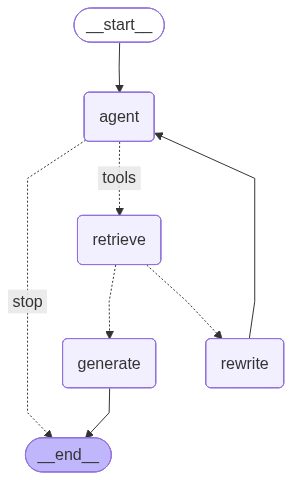

In [37]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode([retriever_tool,retriever_tool_langchain])
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate
)  # Generating a response after we know the documents are relevant
# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        "stop": END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [38]:
from langchain_core.messages import HumanMessage

graph.invoke({
    "messages": [HumanMessage(content="What is LangGraph?")]
})


---CALL AGENT---
---CHECK RELEVANCE---


/Users/nayanverma/learning/RAG/.venv/lib/python3.14/site-packages/langchain_core/runnables/utils.py:750: DeprecationWarning: 'asyncio.iscoroutinefunction' is deprecated and slated for removal in Python 3.16; use inspect.iscoroutinefunction() instead
  return asyncio.iscoroutinefunction(func) or (
/Users/nayanverma/learning/RAG/.venv/lib/python3.14/site-packages/langchain_core/runnables/utils.py:752: DeprecationWarning: 'asyncio.iscoroutinefunction' is deprecated and slated for removal in Python 3.16; use inspect.iscoroutinefunction() instead
  and asyncio.iscoroutinefunction(func.__call__)


---DECISION: DOCS NOT RELEVANT---
no
---TRANSFORM QUERY---
---CALL AGENT---
---CHECK RELEVANCE---


/Users/nayanverma/learning/RAG/.venv/lib/python3.14/site-packages/langchain_core/runnables/utils.py:750: DeprecationWarning: 'asyncio.iscoroutinefunction' is deprecated and slated for removal in Python 3.16; use inspect.iscoroutinefunction() instead
  return asyncio.iscoroutinefunction(func) or (
/Users/nayanverma/learning/RAG/.venv/lib/python3.14/site-packages/langchain_core/runnables/utils.py:752: DeprecationWarning: 'asyncio.iscoroutinefunction' is deprecated and slated for removal in Python 3.16; use inspect.iscoroutinefunction() instead
  and asyncio.iscoroutinefunction(func.__call__)


---DECISION: DOCS NOT RELEVANT---
no
---TRANSFORM QUERY---
---CALL AGENT---
---CHECK RELEVANCE---


/Users/nayanverma/learning/RAG/.venv/lib/python3.14/site-packages/langchain_core/runnables/utils.py:750: DeprecationWarning: 'asyncio.iscoroutinefunction' is deprecated and slated for removal in Python 3.16; use inspect.iscoroutinefunction() instead
  return asyncio.iscoroutinefunction(func) or (
/Users/nayanverma/learning/RAG/.venv/lib/python3.14/site-packages/langchain_core/runnables/utils.py:752: DeprecationWarning: 'asyncio.iscoroutinefunction' is deprecated and slated for removal in Python 3.16; use inspect.iscoroutinefunction() instead
  and asyncio.iscoroutinefunction(func.__call__)


---DECISION: DOCS NOT RELEVANT---
no
---TRANSFORM QUERY---
---CALL AGENT---


KeyboardInterrupt: 

In [27]:
graph.invoke({"messages":"What is Langchain?"})

---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='What is Langchain?', additional_kwargs={}, response_metadata={}, id='b59cf3d6-8a02-4fd0-b641-738c811a4d66'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_sex2', 'function': {'arguments': '{"query": "What is Langchain?"}', 'name': 'retriever_vector_langchain_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 186, 'prompt_tokens': 244, 'total_tokens': 430, 'completion_time': 0.461619046, 'prompt_time': 0.032314096, 'queue_time': 0.500323847, 'total_time': 0.493933142}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_3796682456', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-7ac5a7b9-74fd-4c79-bc87-609019def050-0', tool_calls=[{'name': 'retriever_vector_langchain_blog', 'args': {'query': 'What is Langchain?'}, 'id': 'call_sex2', 'type': 'tool_call'}], usage_metadata={'input_tokens': 244, 'output_tokens': 186, 'total_tokens': 430}),
  ToolMessage(content="Tutorials | 🦜️🔗 La

In [28]:
graph.invoke({"messages":"What is Machine learning?"})

---CALL AGENT---


{'messages': [HumanMessage(content='What is Machine learning?', additional_kwargs={}, response_metadata={}, id='4e92fdbc-f8e4-4411-927c-837a4cea5b6b'),
  AIMessage(content='Machine learning is a subset of artificial intelligence (AI) that focuses on developing algorithms and statistical models. These allow systems to improve at tasks through experience, typically by learning patterns from data, rather than relying solely on explicit programming.\n\n### Key Aspects:\n1. **Data-Driven**: Systems learn from historical data to make predictions or decisions.\n2. **Types of Learning**:\n   - **Supervised Learning**: Uses labeled data (e.g., predicting house prices based on features like size or location).\n   - **Unsupervised Learning**: Finds hidden patterns in unlabeled data (e.g., customer segmentation).\n   - **Reinforcement Learning**: Learns by trial-and-error via rewards/penalties (e.g., game-playing AI).\n\n### Common Applications:\n- Image/speech recognition\n- Recommendation system